In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Source:
@inproceedings{misra2018decomposing,
  title={Decomposing fit semantics for product size recommendation in metric spaces},
  author={Misra, Rishabh and Wan, Mengting and McAuley, Julian},
  booktitle={Proceedings of the 12th ACM Conference on Recommender Systems},
  pages={422--426},
  year={2018},
  organization={ACM}
}

@book{book,
author = {Misra, Rishabh and Grover, Jigyasa},
year = {2021},
month = {01},
pages = {},
title = {Sculpting Data for ML: The first act of Machine Learning},
isbn = {978-0-578-83125-1}
}

rishabhmisra.github.io/publications 

Data: https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation/home

In [252]:
clothes_df = pd.read_json('renttherunway_final_data.json', lines=True)

In [253]:
clothes_df.drop(columns=['review_date', 'item_id', 'user_id', 'review_text', 'review_summary'], axis=1, inplace=True)
clothes_df = clothes_df[(clothes_df['category'] == 'dress')]
clothes_df.drop(columns='category', axis=1, inplace=True)

In [254]:
clothes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92884 entries, 3 to 192542
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fit         92884 non-null  object 
 1   bust size   83995 non-null  object 
 2   weight      78345 non-null  object 
 3   rating      92850 non-null  float64
 4   rented for  92877 non-null  object 
 5   body type   85761 non-null  object 
 6   height      92571 non-null  object 
 7   size        92884 non-null  int64  
 8   age         92486 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.1+ MB


In [255]:
for i in clothes_df.columns:
    missing = clothes_df[i].isnull().sum()*100/clothes_df[i].isnull().count()
    print({'missing': float(missing), 'column': i})

{'missing': 0.0, 'column': 'fit'}
{'missing': 9.570001291934025, 'column': 'bust size'}
{'missing': 15.652857327419147, 'column': 'weight'}
{'missing': 0.036604797381680376, 'column': 'rating'}
{'missing': 0.007536281813875371, 'column': 'rented for'}
{'missing': 7.668705051462038, 'column': 'body type'}
{'missing': 0.3369794582489988, 'column': 'height'}
{'missing': 0.0, 'column': 'size'}
{'missing': 0.4284914517031997, 'column': 'age'}


In [256]:
for i in clothes_df.columns:
    print(i)
    print(clothes_df[i].unique())
    print('\n')

fit
['fit' 'small' 'large']


bust size
['34c' '32b' '34d+' '34b' '36d' '34d' '32d+' '32c' '32dd' '32d' '36b'
 '36c' '32a' nan '34ddd/e' '38d+' '36a' '38d' '34a' '38dd' '36ddd/e'
 '42dd' '36dd' '28f' '38c' '36d+' '34dd' '40d' '38a' '32ddd/e' '42d'
 '34aa' '32aa' '38b' '28c' '36f' '34g' '32f' '40c' '30d' '28g' '30dd'
 '36g' '38f' '30a' '30ddd/e' '44dd' '30g' '38h' '34j' '34f' '38ddd/e'
 '32g' '40ddd/e' '32h' '30c' '44d' '38g' '40g' '28b' '34h' '28a' '30b'
 '40f' '28dd' '36h' '28ddd/e' '30f' '40dd' '44ddd/e' '30i' '32j' '36j'
 '40h' '40b' '36aa' '48d' '38i' '30h' '32i' '42ddd/e' '42c' '28aa' '28d'
 '36i' '42b' '46ddd/e' '44c' '42f' '38aa' '44f' '30aa' '46f' '42g' '34i'
 '44b' '44g' '48dd' '46c' '40i']


weight
['135lbs' '138lbs' '112lbs' '118lbs' '142lbs' '170lbs' '143lbs' '115lbs'
 '145lbs' '140lbs' '120lbs' nan '130lbs' '155lbs' '150lbs' '136lbs'
 '174lbs' '125lbs' '110lbs' '128lbs' '160lbs' '250lbs' '231lbs' '175lbs'
 '126lbs' '210lbs' '165lbs' '215lbs' '180lbs' '163lbs' '106lbs' '178

In [257]:
clothes_df.head()

,fit,bust size,weight,rating,rented for,body type,height,size,age
3,fit,34c,135lbs,8.0,formal affair,pear,"5' 5""",8,34.0
5,fit,32b,138lbs,8.0,date,athletic,"5' 8""",8,45.0
6,fit,34c,112lbs,10.0,everyday,hourglass,"5' 3""",4,27.0
7,fit,34d+,118lbs,10.0,formal affair,full bust,"5' 3""",8,65.0
10,small,34b,135lbs,8.0,party,athletic,"5' 3""",12,33.0


In [258]:
for i in clothes_df.select_dtypes(include=['O']):
    print(i)
    print(clothes_df[i].value_counts())
    print('\n')

fit
fit      66567
small    13686
large    12631
Name: fit, dtype: int64


bust size
34b        12968
34c        11230
34d         8843
36c         6513
36d         5481
           ...  
46c            1
44g            1
46f            1
48dd           1
46ddd/e        1
Name: bust size, Length: 99, dtype: int64


weight
130lbs    6855
135lbs    6541
125lbs    6308
140lbs    6036
120lbs    5078
          ... 
247lbs       1
211lbs       1
221lbs       1
242lbs       1
216lbs       1
Name: weight, Length: 173, dtype: int64


rented for
wedding            30584
party              21505
formal affair      10170
other               9149
work                8920
everyday            6226
date                4216
vacation            2106
party: cocktail        1
Name: rented for, dtype: int64


body type
hourglass            26714
athletic             20606
pear                 11059
petite               10939
full bust             7348
straight & narrow     6678
apple                 2417
Na

### Removing 'lbs' and converting the 'weight' variable into numeric

In [259]:
#convert height to inches
#remove lbs from weight
clothes_df['weight'] = clothes_df['weight'].astype(str).apply(lambda x: x.replace('nan', '0lbs').split('l')[0]).astype(int)
clothes_df.head()

,fit,bust size,weight,rating,rented for,body type,height,size,age
3,fit,34c,135,8.0,formal affair,pear,"5' 5""",8,34.0
5,fit,32b,138,8.0,date,athletic,"5' 8""",8,45.0
6,fit,34c,112,10.0,everyday,hourglass,"5' 3""",4,27.0
7,fit,34d+,118,10.0,formal affair,full bust,"5' 3""",8,65.0
10,small,34b,135,8.0,party,athletic,"5' 3""",12,33.0


In [260]:
#clothes_df['weight'].apply(lambda x: x.split('l'))

In [261]:
clothes_df['weight'].replace(0, round(clothes_df['weight'].mean()), inplace=True)

In [262]:
 clothes_df.dropna(inplace=True)

In [263]:
#nan values in:
#'age', 'height', 'rented for', 'rating', 'bust size'

for i in clothes_df[['age', 'height', 'rented for', 'rating', 'bust size']]:
    clothes_df = clothes_df.drop(clothes_df[clothes_df[i] == 'nan'].index)

### Converting the 'height' variable into centimeters for better usability

In [264]:
clothes_df['height'] = clothes_df['height'].apply(lambda x: x.replace('\"','').split('\''))
clothes_df.head()

,fit,bust size,weight,rating,rented for,body type,height,size,age
3,fit,34c,135,8.0,formal affair,pear,"[5, 5]",8,34.0
5,fit,32b,138,8.0,date,athletic,"[5, 8]",8,45.0
6,fit,34c,112,10.0,everyday,hourglass,"[5, 3]",4,27.0
7,fit,34d+,118,10.0,formal affair,full bust,"[5, 3]",8,65.0
10,small,34b,135,8.0,party,athletic,"[5, 3]",12,33.0


In [265]:
clothes_df['feet'] = clothes_df['height'].apply(lambda x: float(x[0]) * 30.48)
clothes_df['inches'] = clothes_df['height'].apply(lambda x: float(x[1]) * 2.54)

In [266]:
clothes_df.head()

,fit,bust size,weight,rating,rented for,body type,height,size,age,feet,inches
3,fit,34c,135,8.0,formal affair,pear,"[5, 5]",8,34.0,152.4,12.70
5,fit,32b,138,8.0,date,athletic,"[5, 8]",8,45.0,152.4,20.32
6,fit,34c,112,10.0,everyday,hourglass,"[5, 3]",4,27.0,152.4,7.62
7,fit,34d+,118,10.0,formal affair,full bust,"[5, 3]",8,65.0,152.4,7.62
10,small,34b,135,8.0,party,athletic,"[5, 3]",12,33.0,152.4,7.62


In [267]:
clothes_df['height_cm'] = clothes_df['feet'] + clothes_df['inches']
clothes_df.drop(columns=['height', 'feet', 'inches'], axis=1, inplace=True)

In [268]:
clothes_df.head()

,fit,bust size,weight,rating,rented for,body type,size,age,height_cm
3,fit,34c,135,8.0,formal affair,pear,8,34.0,165.10
5,fit,32b,138,8.0,date,athletic,8,45.0,172.72
6,fit,34c,112,10.0,everyday,hourglass,4,27.0,160.02
7,fit,34d+,118,10.0,formal affair,full bust,8,65.0,160.02
10,small,34b,135,8.0,party,athletic,12,33.0,160.02


In [269]:
#remove bust line and clothes_df['cup size'] from clothes_df['bust size']
clothes_df['bust_line'] = clothes_df['bust size'].apply(lambda x: x[:2])
clothes_df['cup_size'] = clothes_df['bust size'].apply(lambda x: x[2:])


In [270]:
clothes_df.drop(columns='bust size', axis=1, inplace=True)
clothes_df.head()

,fit,weight,rating,rented for,body type,size,age,height_cm,bust_line,cup_size
3,fit,135,8.0,formal affair,pear,8,34.0,165.10,34,c
5,fit,138,8.0,date,athletic,8,45.0,172.72,32,b
6,fit,112,10.0,everyday,hourglass,4,27.0,160.02,34,c
7,fit,118,10.0,formal affair,full bust,8,65.0,160.02,34,d+
10,small,135,8.0,party,athletic,12,33.0,160.02,34,b


## EDA

### Univariate Analysis

In [271]:
clothes_df.describe()

,weight,rating,size,age,height_cm
count,79472.000000,79472.000000,79472.000000,79472.000000,79472.00000
mean,134.808373,9.038152,12.007550,33.903891,165.62857
std,21.224448,1.453314,8.042952,7.732612,6.78467
min,50.000000,2.000000,0.000000,0.000000,137.16000
25%,118.000000,8.000000,8.000000,29.000000,160.02000
50%,130.000000,10.000000,12.000000,32.000000,165.10000
75%,145.000000,10.000000,16.000000,37.000000,170.18000
max,285.000000,10.000000,57.000000,117.000000,193.04000


In [272]:
clothes_df.describe(include=['O'])

,fit,rented for,body type,bust_line,cup_size
count,79472,79472,79472,79472,79472
unique,3,9,7,11,13
top,fit,wedding,hourglass,34,c
freq,56896,25598,24743,37535,22651


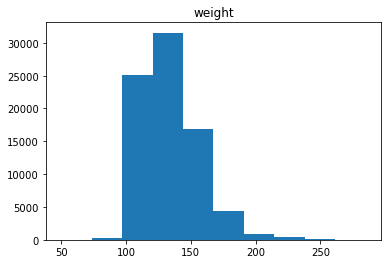

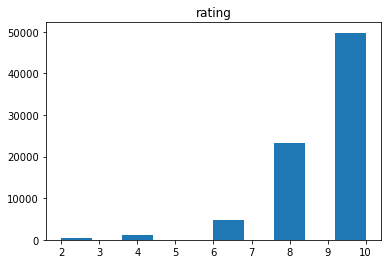

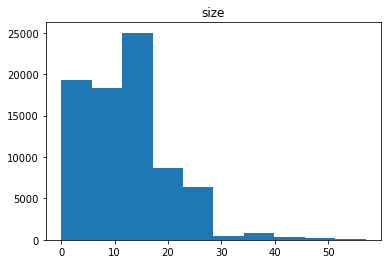

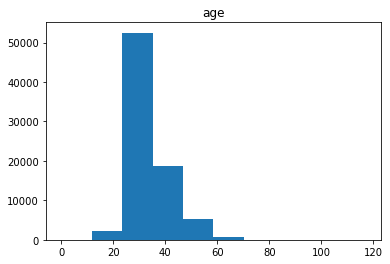

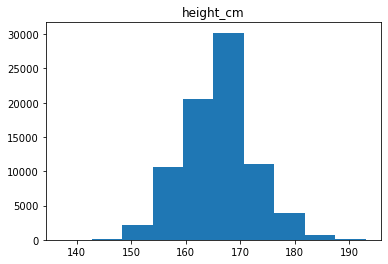

In [273]:
for i in clothes_df.select_dtypes(include='number'):
    plt.hist(clothes_df[i])
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'horizontal bar chart of fit')

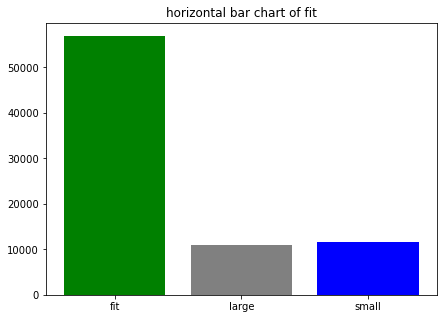

In [274]:
plt.figure(figsize=(7,5))
plt.bar(clothes_df.groupby("fit")["fit"].count().index, 
         clothes_df.groupby("fit")["fit"].count(), 
         color=["green","gray","blue"])
plt.title("horizontal bar chart of fit")

In [275]:
clothes_df['fit'].value_counts()

fit      56896
small    11688
large    10888
Name: fit, dtype: int64

In [276]:
clothes_df['fit'].describe()  

count     79472
unique        3
top         fit
freq      56896
Name: fit, dtype: object

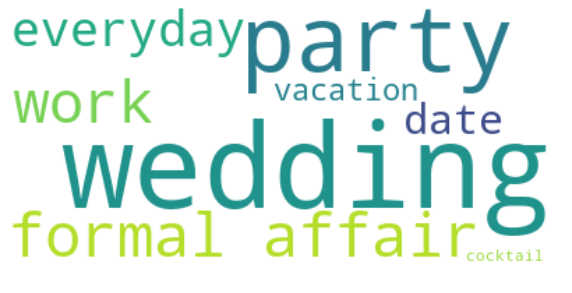

In [277]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(" ".join(clothes_df["rented for"]))
plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

### Bivariate Analysis

##### Continuous/Continuous

In [278]:
clothes_df.corr()

,weight,rating,size,age,height_cm
weight,1.000000,-0.015915,0.647831,0.043903,0.337446
rating,-0.015915,1.000000,-0.033398,-0.030851,0.003031
size,0.647831,-0.033398,1.000000,0.126870,0.222117
age,0.043903,-0.030851,0.126870,1.000000,-0.018514
height_cm,0.337446,0.003031,0.222117,-0.018514,1.000000


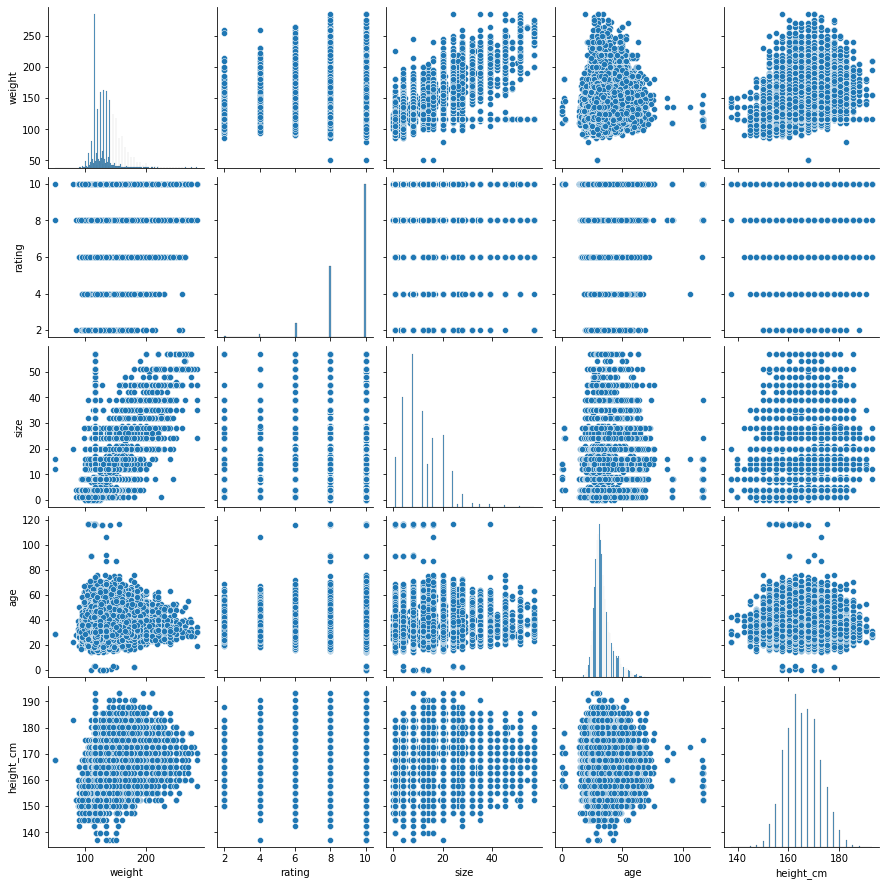

In [279]:
sns.pairplot(data=clothes_df)

size and weight (0.657)

weight and height_cm (0.339)

size and height_cm (0.236)

size and age (0.153)

#### Categorical/Continuous

In [280]:
clothes_df.groupby('fit').mean()

,weight,rating,size,age,height_cm
fit,,,,,
fit,134.754095,9.258507,11.921734,33.968961,165.679062
large,134.846436,8.542432,10.510287,33.522777,165.380175
small,135.037132,8.427276,13.820072,33.942163,165.614172


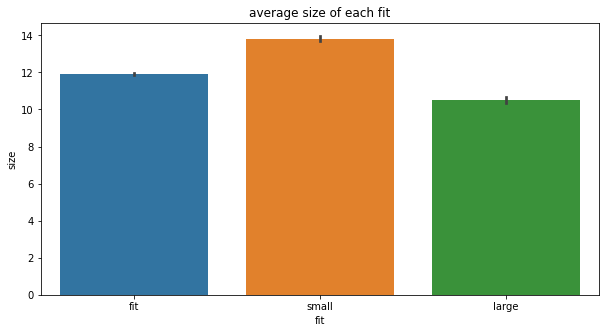

In [281]:
plt.figure(figsize=(10,5))

#plt.subplot(1,3,1)
sns.barplot(x=clothes_df["fit"], y=clothes_df["size"], data=clothes_df)
plt.title("average size of each fit")
plt.show()

#### Categorical/Categorical

In [282]:
count_table = pd.crosstab(clothes_df["fit"], clothes_df["body type"])
count_table

body type,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
fit,,,,,,,
fit,1598,13848,4626,17789,7262,7305,4468
large,301,2429,964,3402,1633,1386,773
small,335,2974,982,3552,1385,1504,956


In [283]:
count_table = pd.crosstab(clothes_df["fit"], clothes_df["cup_size"])
count_table

cup_size,a,aa,b,c,d,d+,dd,ddd/e,f,g,h,i,j
fit,,,,,,,,,,,,,
fit,5043,209,16007,16145,14832,1259,2197,849,146,136,56,13,4
large,953,35,3006,3154,2882,209,409,180,24,24,8,3,1
small,978,59,3171,3352,3159,232,498,172,26,26,9,4,2


In [284]:
count_table = pd.crosstab(clothes_df["fit"], clothes_df["bust_line"])
count_table

bust_line,28,30,32,34,36,38,40,42,44,46,48
fit,,,,,,,,,,,
fit,77,264,13313,26828,13150,3022,147,58,35,0,2
large,8,60,2633,5154,2375,600,41,12,4,0,1
small,13,51,2746,5553,2678,615,24,5,2,1,0


In [285]:
#bust_line = categorical --> interval, rating = categorical --> ordinal

### Model Prep

In [ ]:
# normalize...maybe?

In [292]:
# scale
'''from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(clothes_df)'''

'from sklearn.preprocessing import StandardScaler\nStandardScaler().fit_transform(house_df)'

### Models

#### Logistic Regression (multiclass)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv=5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(lr_cv_scores)))

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=24)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores))

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
rf_cv_scores = cross_val_score(neighbors, X_train, y_train, cv=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

#### SVM

#### Gradient Boosting??